In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 15.4 MB 21.5 MB/s 
     |████████████████████████████████| 6.3 MB 48.7 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


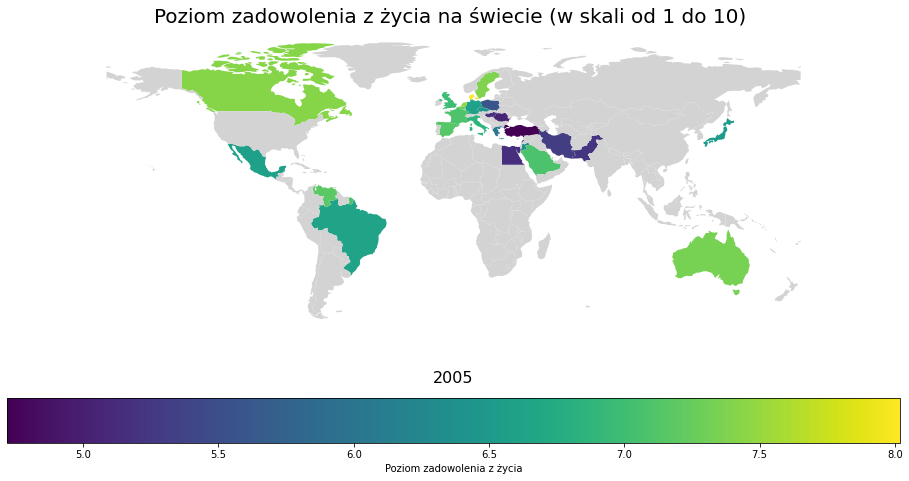

In [2]:
!pip install -U -q PyDrive
!pip install -q xlrd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

!pip install geopandas
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1c9phCZ5IcjFSGVmSOuIQ_YFpqPeCoxC7'
downloaded = drive.CreateFile({'id': file_id})

output_file = 'Happiness_Level.csv'

downloaded.GetContentFile(output_file,mimetype='text/csv')

import pandas as pd
basedf = pd.read_csv(output_file)
basedf = basedf.rename(columns = {'Life satisfaction in Cantril Ladder (World Happiness Report 2021)': 'Life satisfaction',
                           'Entity': 'Country'})
years = np.sort(np.unique(basedf.Year.values))
df = basedf[basedf.Year==2005]

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[world.name != "Antarctica"]
world = world[["name","geometry"]]
world = world.rename(columns = {'name': 'Country'})
data = pd.merge(world, df, how = "outer", on = ["Country"])


fig = plt.figure(figsize=(16,8))
plt.ion()
ax = fig.add_subplot(1,1,1)
ax = data.plot(column = "Life satisfaction",
          missing_kwds = {'color': 'lightgrey'},
           ax = ax,
           legend = "True",
           legend_kwds = {'label': "Poziom zadowolenia z życia",'orientation': "horizontal"})
#ax.set_xlabel(fontdict={'fontsize':24})

line, = ax.plot([], [])

def animuj(year):
  df = basedf[basedf.Year==year]
  data = pd.merge(world, df, how = "outer", on = ["Country"])
  plt.cla()
  # fig = plt.figure(figsize=(16,8))
  ax = fig.add_subplot(1,1,1)
  ax = data.plot(column = "Life satisfaction",
              missing_kwds = {'color': 'lightgrey'},
              ax = ax)
  plt.annotate(year, xy = (0, 0), ha="center", va="center", xytext = (0 , -85), size = 16)
  ax.set_axis_off()
  ax.set_title("Poziom zadowolenia z życia na świecie (w skali od 1 do 10) ", size = 20)

  return line,

from matplotlib.animation import FuncAnimation
from matplotlib import rc
from matplotlib import rcParams
rc('animation', html = 'jshtml')
anim = FuncAnimation(fig,animuj,frames=years,interval=1000)
#!apt install imagemagick
#anim.save('anim.gif',writer='pillow',fps=1)
#rcParams['animation.convert_path'] = r'C:\Program Files\ImageMagick\convert'
#rcParams['animation.ffmpeg_path'] = r'C:\Program Files\ffmpeg\bin\ffmpeg.exe'
anim

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


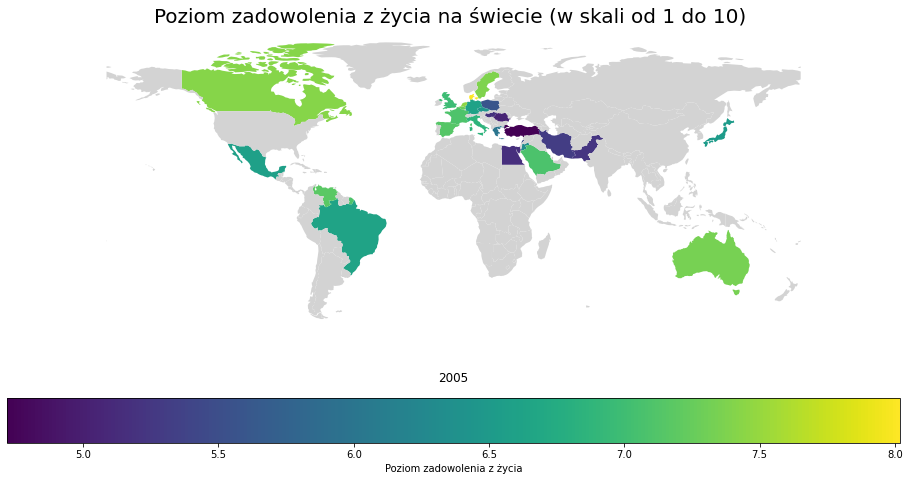

In [3]:
fig = plt.figure(figsize=(16,8))
plt.ion()
ax = fig.add_subplot(1,1,1)
ax = data.plot(column = "Life satisfaction",
          missing_kwds = {'color': 'lightgrey'},
           ax = ax,
           legend = "True",
           legend_kwds = {'label': "Poziom zadowolenia z życia",'orientation': "horizontal"})

line, = ax.plot([], [])

def animuj(year):
  df = basedf[basedf.Year==year]
  data = pd.merge(world, df, how = "outer", on = ["Country"])
  plt.cla()
  # fig = plt.figure(figsize=(16,8))
  ax = fig.add_subplot(1,1,1)
  ax = data.plot(column = "Life satisfaction",
              missing_kwds = {'color': 'lightgrey'},
              ax = ax)
  plt.annotate(year, xy = (0, 0), ha="center", va="center", xytext = (0 , -85), size = 12)
  ax.set_axis_off()
  ax.set_title("Poziom zadowolenia z życia na świecie (w skali od 1 do 10) ", size = 20)

  return line,

from matplotlib.animation import FuncAnimation
from matplotlib import rc
from matplotlib import rcParams
rc('animation', html = 'jshtml')
anim = FuncAnimation(fig,animuj,frames=years,interval=1000)
anim
anim.save('worldmap.mp4', extra_args=['-vcodec','libx264'])

from google.colab import files
files.download("worldmap.mp4")

In [4]:
file_id = '1n4bRfSf8lVmsrqNnNiIBtMNJCeA5hYMl'
downloaded = drive.CreateFile({'id': file_id})

output_file = 'BangladeshMentalHealth.csv'

downloaded.GetContentFile(output_file,mimetype='text/csv')

!pip install -q xlrd

import pandas as pd
df = pd.read_excel(output_file)
df.head(10)

,Gender,Age,Marital status,Famiy type,No of family member,Monthly family income,Residence,Intake of physical exercise,Sleeping status,Sleeping stisfaction,Internet browsing hours,Satisfaction on study,Smoking habit,Depression,Anxiety,Stress,Total DASS score
0,Male,18-24 years,Single,Nuclear,<5,Lower class,Rural,Yes,Normal (7-9 hours),Yes,5-6 hours,No,Yes,Moderate,Moderate,Mild,42
1,Male,18-24 years,Single,Nuclear,<5,Lower class,Rural,Yes,Normal (7-9 hours),Yes,>6 hours,No,No,Moderate,Normal,Mild,38
2,Male,18-24 years,Single,Nuclear,<5,Lower class,Rural,No,Normal (7-9 hours),Yes,>6 hours,Yes,No,Normal,Extremely severe,Severe,64
3,Male,18-24 years,Single,Nuclear,<5,Lower class,Rural,No,Normal (7-9 hours),No,>6 hours,No,No,Moderate,Extremely severe,Severe,70
4,Male,25-29 years,Single,Nuclear,<5,Lower class,Rural,No,Normal (7-9 hours),Yes,2-4 hours,No,Yes,Extremely severe,Extremely severe,Extremely severe,96
5,Male,18-24 years,Single,Nuclear,<5,Lower class,Rural,No,More than normal,Yes,>6 hours,No,No,Severe,Moderate,Severe,64
6,Male,18-24 years,Single,Nuclear,<5,Lower class,Rural,Yes,Normal (7-9 hours),No,2-4 hours,No,Yes,Extremely severe,Extremely severe,Extremely severe,104
7,Male,18-24 years,Single,Nuclear,<5,Lower class,Rural,No,Normal (7-9 hours),Yes,>6 hours,No,No,Severe,Severe,Moderate,60
8,Male,18-24 years,Single,Nuclear,<5,Lower class,Rural,No,Normal (7-9 hours),Yes,>6 hours,No,No,Normal,Extremely severe,Normal,28
9,Male,18-24 years,Single,Nuclear,<5,Lower class,Rural,Yes,Normal (7-9 hours),Yes,2-4 hours,Yes,No,Normal,Normal,Normal,0


Text(0.5, 1.0, 'Porównanie czasu korzystania z internetu \nz satysfakcją ze studiów wśród studentów z Bangladeszu')

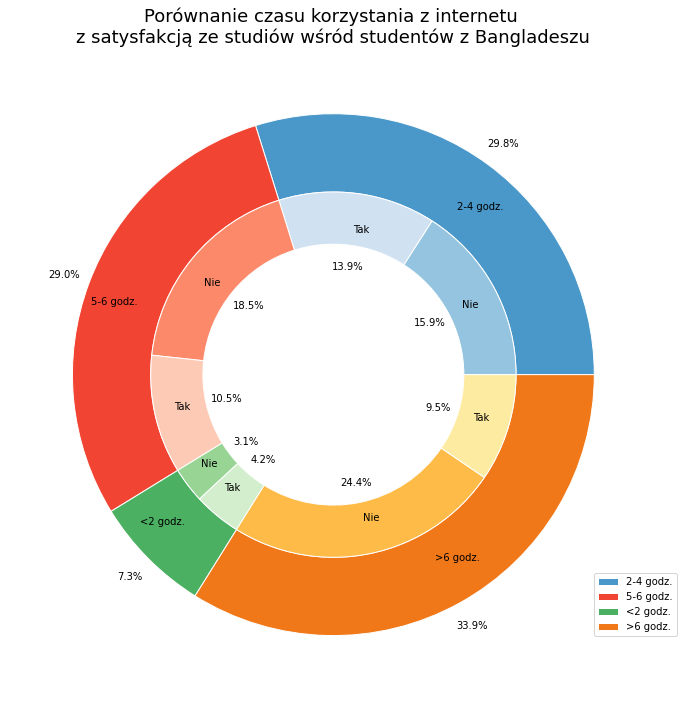

In [5]:
dfs = df[['Satisfaction on study','Internet browsing hours']].value_counts()

dfp = pd.DataFrame(dfs)
dfp.columns = ['Count']
outer = dfp.groupby('Internet browsing hours').sum()
inner = dfp.groupby(['Internet browsing hours','Satisfaction on study']).sum()
inner_labels = inner.index.get_level_values(1)
outer_labels = outer.index
innerLabels = []
for i in range (inner_labels.size):
  if (inner_labels[i] == 'No'):
    innerLabels.append('Nie')
  if (inner_labels[i] == 'Yes'):
    innerLabels.append('Tak')
outerLabels = []
for i in range (outer_labels.size):
  outerLabels.append(outer_labels[i].replace("hours", "godz."))
fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

a, b, c, d = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.YlOrBr]
light = 0.2
dark = 0.4
normal = 0.6

ax.pie(outer.values.flatten(), radius=1,
       labels = outerLabels,
       autopct='%1.1f%%',
       wedgeprops = dict(width=size, edgecolor='w'),
       pctdistance = 1.1,
       labeldistance = 0.8,
       colors = [a(normal), b(normal), c(normal), d(normal)])

ax.pie(inner.values.flatten(), radius=1-size, 
       labels = innerLabels,
       autopct='%1.1f%%',
       wedgeprops = dict(width=0.2, edgecolor='w'),
       pctdistance = 0.6,
       labeldistance = 0.8,
       colors = [a(dark), a(light), b(dark), b(light), c(dark), c(light), d(dark), d(light)])
group_names = outerLabels

plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:4], group_names, loc=(0.9, 0.1))
ax.set_title("Porównanie czasu korzystania z internetu \nz satysfakcją ze studiów wśród studentów z Bangladeszu", size = 18)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

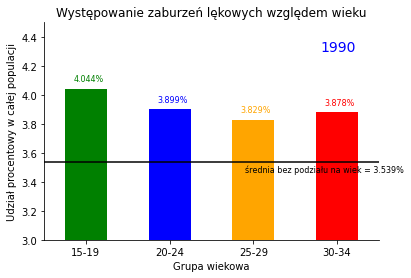

In [6]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1vgfNV7dYPxYlC6AR1oLganP5DZocXML8'
downloaded = drive.CreateFile({'id': file_id})

output_file = 'Anxiety.csv'

downloaded.GetContentFile(output_file,mimetype='text/csv')

!pip install -q xlrd

import pandas as pd
basedf = pd.read_csv(output_file)
dfp = basedf[["Year",
          "Prevalence - Anxiety disorders - Sex: Both - Age: 15 to 19 (Percent)",
          "Prevalence - Anxiety disorders - Sex: Both - Age: 20 to 24 (Percent)",
          "Prevalence - Anxiety disorders - Sex: Both - Age: 25 to 29 (Percent)",
          "Prevalence - Anxiety disorders - Sex: Both - Age: 30 to 34 (Percent)"]]
dfp = dfp.rename(columns = {'Prevalence - Anxiety disorders - Sex: Both - Age: 15 to 19 (Percent)': '15-19', 
                            'Prevalence - Anxiety disorders - Sex: Both - Age: 20 to 24 (Percent)': '20-24', 
                            'Prevalence - Anxiety disorders - Sex: Both - Age: 25 to 29 (Percent)': '25-29', 
                            'Prevalence - Anxiety disorders - Sex: Both - Age: 30 to 34 (Percent)': '30-34', 
                            'Year': 'Lata'})

dfb = basedf[["Year",
          "Prevalence - Anxiety disorders - Sex: Both - Age: All Ages (Percent)"]]
dfb = dfb.rename(columns = {'Prevalence - Anxiety disorders - Sex: Both - Age: All Ages (Percent)': 'AllAges', 
          'Year': 'Lata'})

fig, ax = plt.subplots()
dfp = dfp.set_index("Lata")
dfb = dfb.set_index("Lata")
dfbs = dfb["AllAges"]
#baseValue = dfbs.get(year)

# dfp.plot.bar(ax = ax)
# ax.set_ylim(0,6)
# ax.set_ylabel("Udział procentowy w całej populacji")
# ax.set_title("Występowanie zaburzeń lękowych względem wieku")
# ax.annotate(str(year), xy = [-0.45,5.5], xytext = [-0.45,5.5], color = "Blue", fontsize = 14)
# ax.hlines(y = baseValue, xmin = -1000, xmax = 2000)

years = np.sort(np.unique(basedf.Year.values))


line, = ax.plot([], [])

def animuj(year):
  dfpp = dfp.loc[year]
  dfbb = dfb.loc[year]
  baseValue = dfbb["AllAges"]
  plt.cla()

  colors = ['Green','Blue','Orange','Red']
  dfpp.plot.bar(ax = ax, color = colors)
  val = []
  val.append(dfpp["15-19"])
  val.append(dfpp["20-24"])
  val.append(dfpp["25-29"])
  val.append(dfpp["30-34"])
  plt.xticks(rotation='horizontal')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.set_ylim(3,4.5)
  ax.set_ylabel("Udział procentowy w całej populacji")
  ax.set_xlabel("Grupa wiekowa")
  ax.set_title("Występowanie zaburzeń lękowych względem wieku")
  ax.annotate(str(year), xy = [2.8,4.3], xytext = [2.8,4.3], color = "Blue", fontsize = 14)
  #ax.annotate(str(round(baseValue,3)) + "%", xy = [3.5,baseValue+0.05], xytext = [3.5,baseValue+0.05], color = "Black", fontsize = 8)
  ax.annotate("średnia bez podziału na wiek = "+ str(round(baseValue,3)) + "%", xy = [1.9,baseValue-0.07], xytext = [1.9,baseValue-0.07], color = "Black", fontsize = 8)
  for i in range(len(val)):
    ax.annotate(str(round(val[i],3)) + "%", xy = [i-0.15,val[i]+0.05], xytext = [i-0.15,val[i]+0.05], color = colors[i], fontsize = 8)

  ax.hlines(y = baseValue, xmin = -0.5, xmax = 3.5)

  return line,

from matplotlib.animation import FuncAnimation
from matplotlib import rc
from matplotlib import rcParams
rc('animation', html = 'jshtml')
anim = FuncAnimation(fig, animuj, frames = years, interval = 700)
anim

anim.save('anxiety.mp4', extra_args=['-vcodec','libx264'])

from google.colab import files
files.download("anxiety.mp4")


Text(0.5, 1.0, 'Zaburzenia odżywiania względem wieku wśród młodych ludzi w Polsce na przestrzeni lat')

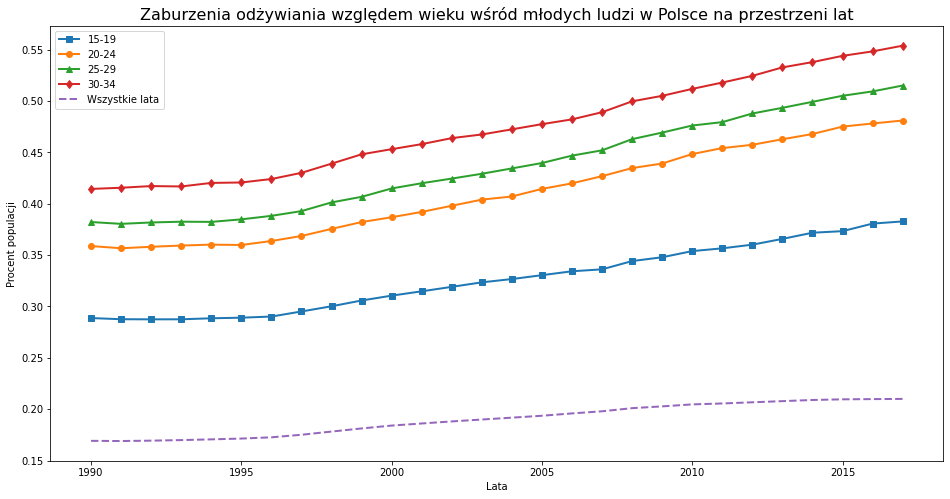

In [7]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '17DQPPgsO25BW4DzFZ76kcNbS1c0tQGnZ'
downloaded = drive.CreateFile({'id': file_id})

output_file = 'Poland_EatingDisorders.csv'

downloaded.GetContentFile(output_file,mimetype='text/csv')

!pip install -q xlrd

import pandas as pd
df = pd.read_csv(output_file)
df = df[['Year', 'Prevalence - Eating disorders - Sex: Both - Age: 15 to 19 (Percent)', 'Prevalence - Eating disorders - Sex: Both - Age: 20 to 24 (Percent)', 'Prevalence - Eating disorders - Sex: Both - Age: 25 to 29 (Percent)', 'Prevalence - Eating disorders - Sex: Both - Age: 30 to 34 (Percent)', 'Prevalence - Eating disorders - Sex: Both - Age: All Ages (Percent)']]
df = df.rename(columns = {'Prevalence - Eating disorders - Sex: Both - Age: 15 to 19 (Percent)': '15-19', 
                            'Prevalence - Eating disorders - Sex: Both - Age: 20 to 24 (Percent)': '20-24', 
                            'Prevalence - Eating disorders - Sex: Both - Age: 25 to 29 (Percent)': '25-29', 
                            'Prevalence - Eating disorders - Sex: Both - Age: 30 to 34 (Percent)': '30-34',  
                            'Prevalence - Eating disorders - Sex: Both - Age: All Ages (Percent)': 'Wszystkie lata', 
                            'Year': 'Lata'})
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
dfl = df.set_index("Lata")
dfl.plot.line(ax=ax, style=['s-', 'o-', '^-','d-','--'], linewidth = 2)
ax.set_ylabel("Procent populacji")
ax.set_title("Zaburzenia odżywiania względem wieku wśród młodych ludzi w Polsce na przestrzeni lat", size = 16)

Text(0.5, 1.0, 'Liczba osób z zaburzeniami odżywiania (kobiety i mężczyźni)')

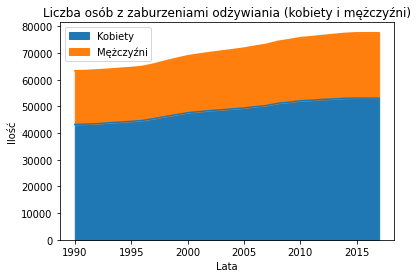

In [8]:
file_id = '1mVAbt2iGmT8QvfnoEHEO5j4Biu0B93tA'
downloaded = drive.CreateFile({'id': file_id})

output_file = 'EatingDisorders.csv'

downloaded.GetContentFile(output_file,mimetype='text/csv')

!pip install -q xlrd

import pandas as pd
df = pd.read_csv(output_file)
df = df.rename(columns = {'Prevalence - Eating disorders - Sex: Female - Age: All Ages (Number)': 'Kobiety', 'Prevalence - Eating disorders - Sex: Male - Age: All Ages (Number)': 'Mężczyźni', 'Year': 'Lata'})
df2 = df[["Lata","Kobiety","Mężczyźni"]]
df3 = df2.set_index("Lata")

ax = df3.plot.area()
ax.set_ylabel("Ilość")
ax.set_title("Liczba osób z zaburzeniami odżywiania (kobiety i mężczyźni)")

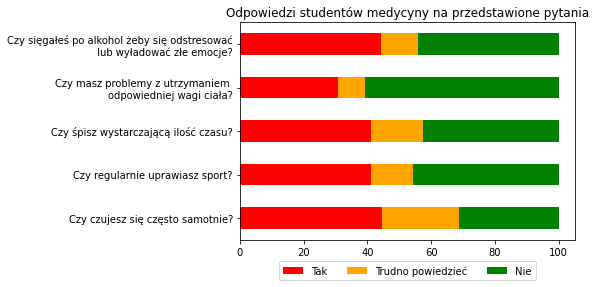

In [11]:
!pip install -U -q PyDrive
!pip install -q xlrd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1vnr9l7EqFyeI3NH3KA_nFS94s82fGG-V'
downloaded = drive.CreateFile({'id': file_id})

output_file = 'Studenci_Polski.csv'

downloaded.GetContentFile(output_file,mimetype='text/csv')

import pandas as pd
df = pd.read_csv(output_file)
df2 = pd.DataFrame({'Tak': [44.57, 41.06, 40.96, 30.69, 44.38],
                    'Trudno powiedzieć': [24.14, 13.29, 16.42, 8.41, 11.53],
                    'Nie': [31.26, 45.65, 42.62, 60.90, 44.09]},
                    index = ['Czy czujesz się często samotnie?', 'Czy regularnie uprawiasz sport?', 'Czy śpisz wystarczającą ilość czasu?', 'Czy masz problemy z utrzymaniem \nodpowiedniej wagi ciała?', 'Czy sięgałeś po alkohol żeby się odstresować\n lub wyładować złe emocje?'])

label = ['Tak', 'Trudno powiedzieć', 'Nie']
colors = ['Red','Orange','Green']
df2.plot.barh(stacked=True, color = colors, title = 'Odpowiedzi studentów medycyny na przedstawione pytania')
plt.legend(loc = 'lower center', ncol = 3, borderaxespad = -4)

Text(0.5, 0, 'Poziom depresji')

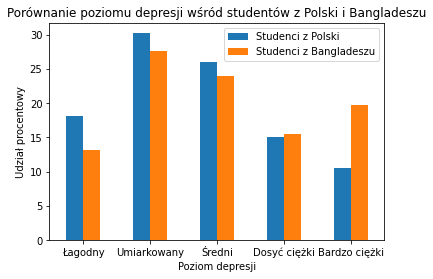

In [12]:
!pip install -U -q PyDrive
!pip install -q xlrd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1eCkLzjkPDoLfS7SxhSlFXwdW0e4xxc-G'
downloaded = drive.CreateFile({'id': file_id})

output_file = 'Studenci_Depresja.csv'

downloaded.GetContentFile(output_file,mimetype='text/csv')

import pandas as pd
df = pd.read_csv(output_file)

Polska = [18.18, 30.21, 26.00, 15.05, 10.56]
Bangladesz = [13.21, 27.67, 23.93, 15.47, 19.72]
index = ['Łagodny', 'Umiarkowany', 'Średni', 'Dosyć ciężki', 'Bardzo ciężki']
df2 = pd.DataFrame({'Studenci z Polski': Polska, 'Studenci z Bangladeszu': Bangladesz}, index = index)
ax = df2.plot.bar(rot=0)
ax.set_title("Porównanie poziomu depresji wśród studentów z Polski i Bangladeszu")
ax.set_ylabel("Udział procentowy")
ax.set_xlabel("Poziom depresji")

Text(0.5, 1.0, 'Pozycja w światowym rankingu na tle poziomu szczęścia w Polsce')

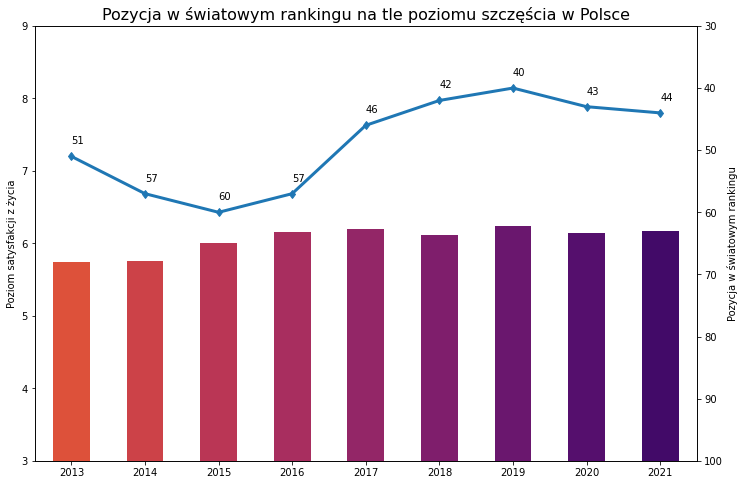

In [13]:
!pip install -U -q PyDrive
!pip install -q xlrd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '17UtO5rWLzAJ6yQr14e2A8oDi8ZWEFxHT'
downloaded = drive.CreateFile({'id': file_id})

output_file = 'PolandHappinessLevel.csv'

downloaded.GetContentFile(output_file,mimetype='text/csv')

import pandas as pd
df = pd.read_csv(output_file)
df = df.rename(columns = {'Life satisfaction': 'LifeSatisfaction', 'World Happiness Ranking': 'WorldHappinessRanking'})

# fig = plt.figure(figsize = (16,8))
# ax1 = df.plot.bar(x = 'Year', y = 'Life satisfaction', rot = 0)
# ax1.set_ylim(3,8)
# ax2 = ax1.twinx()
# df.plot.line(x = 'Year', y = 'World Happiness Ranking', rot = 0, ax = ax2)

fig, ax1 = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
ax2 = ax1.twinx()
rspine = ax2.spines['right']
# rspine.set_position(('axes',1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
ax1.set_ylim(3,9)
ax2.set_ylim(30,100)
ax2.invert_yaxis()
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 9))
df.LifeSatisfaction.plot.bar(ax = ax1, color = color)
ax1.set_xticklabels(df.Year, rotation = 0)
df.WorldHappinessRanking.plot(ax = ax2, style = 'd-', linewidth = 3)
for i in range(9):
  ax2.annotate(df.WorldHappinessRanking[i], (i,df.WorldHappinessRanking[i]-2), (i,df.WorldHappinessRanking[i]-2))

ax1.set_ylabel("Poziom satysfakcji z życia")
ax2.set_ylabel("Pozycja w światowym rankingu")
ax1.set_title("Pozycja w światowym rankingu na tle poziomu szczęścia w Polsce", size = 16)
#df.WorldHappinessRanking.plot.scatter(x = [0,1,2,3,4,5,6,7,8], y = df.WorldHappinessRanking, ax = ax2, color = 'Green')
#ax2.scatter(x = df.Year, y = df.WorldHappinessRanking, s = 50, c = 'Red')